In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def check_probability_matrix(matrix):
    row_sums = np.sum(matrix, axis=1)
    return np.allclose(row_sums, 1)

n_states = 8
epsilon = 1e-6
max_steps = 1000

transition_matrix = np.array([
    [0.2, 0.05, 0.1, 0.1, 0.15, 0.15, 0.15, 0.1],
    [0.1, 0.2, 0.05, 0.1, 0.1, 0.15, 0.2, 0.1],
    [0.15, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.15],
    [0.15, 0.1, 0.15, 0.2, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2],
    [0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.1, 0.2],
    [0.25, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.1, 0.15, 0.15, 0.1, 0.1, 0.1]
])


initial_vector_1 = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
initial_vector_2 = np.array([0.15, 0.1, 0.1, 0.1, 0.15, 0.1, 0.2, 0.1])

initial_vectors = [initial_vector_1, initial_vector_2]

if check_probability_matrix(transition_matrix):
    print("Матрица переходных состояний верна.")
else:
    print("Внимание: Сумма вероятностей в каждой строке матрицы P не равна 1.")

if np.isclose(np.sum(initial_vector_1), 1):
    print("Вектор начальных состояний 1 верен.")
else:
    print("Внимание: Сумма вероятностей в векторе начальных состояний 1 не равна 1.")

if np.isclose(np.sum(initial_vector_2), 1):
    print("Вектор начальных состояний 2 верен.")
else:
    print("Внимание: Сумма вероятностей в векторе начальных состояний 2 не равна 1.")

Матрица переходных состояний верна.
Вектор начальных состояний 1 верен.
Вектор начальных состояний 2 верен.


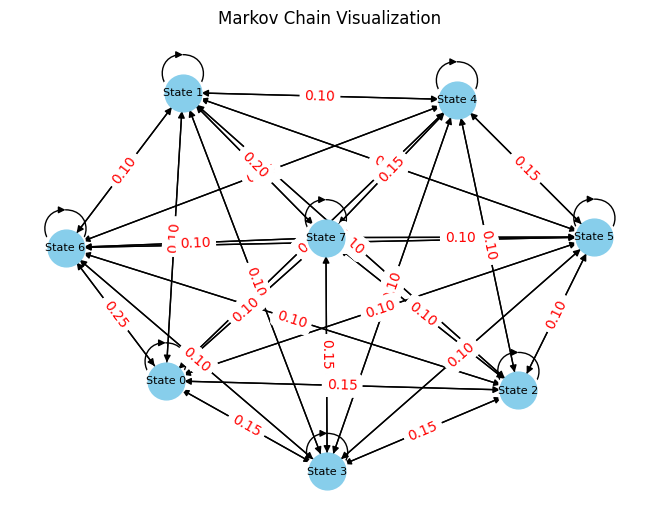

In [ ]:
G = nx.DiGraph()
num_states = len(transition_matrix)
for i in range(num_states):
    for j in range(num_states):
        if transition_matrix[i, j] > 0:
            G.add_edge(i, j, weight=transition_matrix[i, j])

pos = nx.spring_layout(G)
labels = {i: f'State {i}' for i in range(num_states)}
edge_labels = {(i, j): f'{transition_matrix[i, j]:.2f}' for i, j in G.edges}

nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, node_color='skyblue', font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Markov Chain Visualization")
plt.show()

### Численный метод

In [ ]:
def simulate_markov_chain(initial_vector, transition_matrix, epsilon, max_steps):
    current_vector = initial_vector
    step = 0
    deviations = []

    while step < max_steps:
        next_vector = np.dot(current_vector, transition_matrix)

        deviation = np.linalg.norm(next_vector - current_vector)
        if np.linalg.norm(next_vector - current_vector) < epsilon:
            break

        deviations.append(deviation)
        current_vector = next_vector
        step += 1

    return current_vector, step, deviations

Финальный вектор вероятностей: [0.14369125 0.11772992 0.11114922 0.11841211 0.13961641 0.11902227
 0.11895742 0.13142141]
Количество шагов: 5


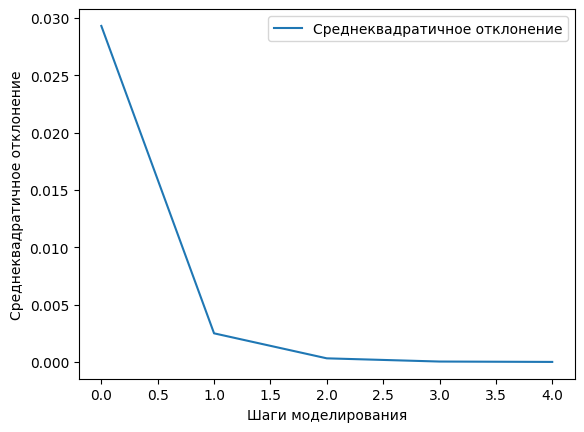

Финальный вектор вероятностей: [0.14369048 0.11773095 0.11114912 0.11841242 0.13961611 0.11902205
 0.11895756 0.13142131]
Количество шагов: 6


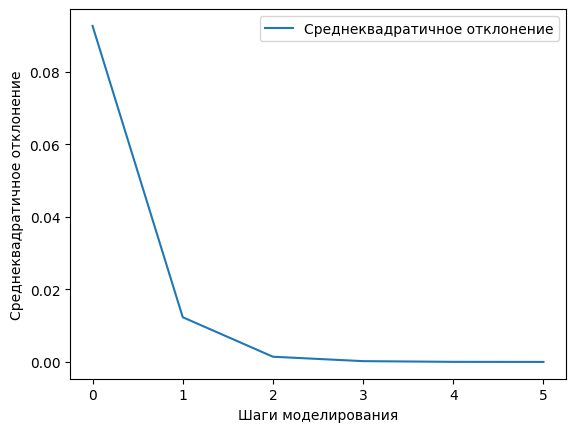

In [ ]:
result_vectors = []

for initial_vector in initial_vectors:
  result_vector, steps_taken, deviations = simulate_markov_chain(initial_vector, transition_matrix, epsilon, max_steps)

  print("Финальный вектор вероятностей:", result_vector)
  print("Количество шагов:", steps_taken)

  plt.plot(range(len(deviations)), deviations, label='Среднеквадратичное отклонение')
  plt.xlabel('Шаги моделирования')
  plt.ylabel('Среднеквадратичное отклонение')
  plt.legend()
  plt.show()
  result_vectors.append(result_vector)

### Аналитический метод

In [ ]:
# Уравнение P * transition_matrix = P можно переписать как (P * transition_matrix - P) = 0
# Добавим условие нормировки
A = np.vstack((transition_matrix.T - np.eye(8), np.ones(8)))
b = np.zeros(9)
b[-1] = 1

solution = np.linalg.lstsq(A, b, rcond=None)[0]
stationary_distribution = solution[0:]

print("Стационарное распределение:")
print(stationary_distribution)

Стационарное распределение:
[0.14369078 0.11773066 0.11114898 0.11841229 0.13961621 0.11902218
 0.1189576  0.13142129]
